<img src="https://user-images.githubusercontent.com/91726340/223084103-c04326c3-f9cc-437d-8a85-abb0865400ec.png" alt="Image 1" style="float:right; margin-left:1px;" width="650"/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVTzOxnoyMALaVwLgFBvspZvkDC7OzjYBeQg&usqp=CAU" alt="Image 2" style="float:left; margin-right:1px;" width="650"/>


# Karan Soni

## Project summery and steps
#### 1. Data Acquisition 
#### 2. Data Preprocessing 
#### 3. Data EDA
#### 4. Model Building 
#### 5. Model Conclusion 
#### 6. key insight - Recognized the significance of accurate sales prediction for cost optimization and data-driven decision-making in businesses.

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

## Data Read ,Clean and Pre-Processing 

In [2]:
ads_df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
ads_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Cheking the information of dataframe
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# Here we easily seen the distribution of dataset with the help of all central tendencies 
ads_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
# checking of null values 
ads_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
# checking for duplicate values 
ads_df.duplicated().sum()

0

In [7]:
#ProfileReport(ads_df)

In [8]:
# Droping unwanted column
ads_df.drop(['Unnamed: 0'], axis=1, inplace = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Columns Scatter Plot')

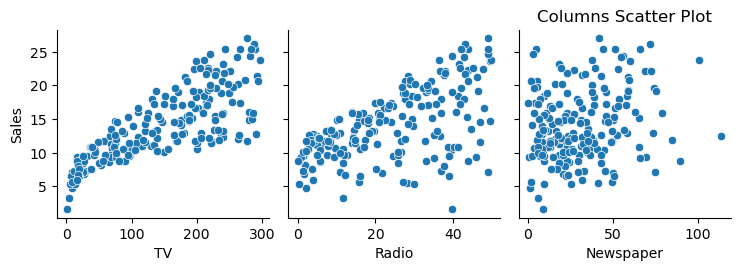

In [9]:
# Pair Plot of the columns 
sns.pairplot(ads_df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')
plt.title('Columns Scatter Plot')

## Handling Outliers in the Column

<Axes: >

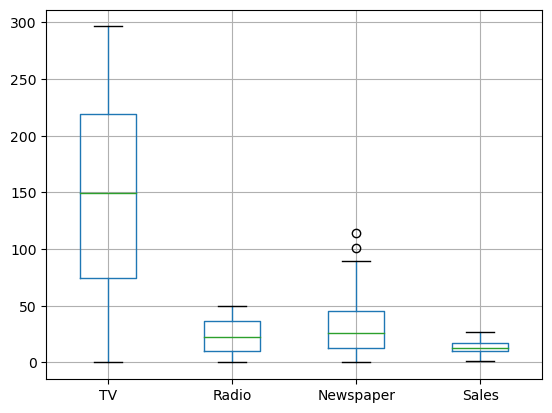

In [10]:
ads_df.boxplot()

#### Upon closer examination of our dataset, we've identified the presence of outliers in the "Newspaper" column. These outliers represent data points that deviate significantly from the majority, potentially affecting our analysis. However, it's worth noting that outliers are not limited to this column alone.

#### The "TV" column, in particular, stands out due to its large numerical values. These values can be considered outliers when compared to the rest of the data. This column's magnitude can have a significant impact on our model's accuracy. In some cases, it may even lead to misleadingly high accuracy during training. Furthermore, the "TV" column carries a substantial weight in the decision-making process, potentially introducing bias into our models..

In [13]:
# Cliping the Outlier values
# Calculate Q1 and Q3 for each column
q1 = ads_df.quantile(0.25)
q3 = ads_df.quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for clipping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# clip values within the IQR range
new_capped_df = ads_df.apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))

<Axes: >

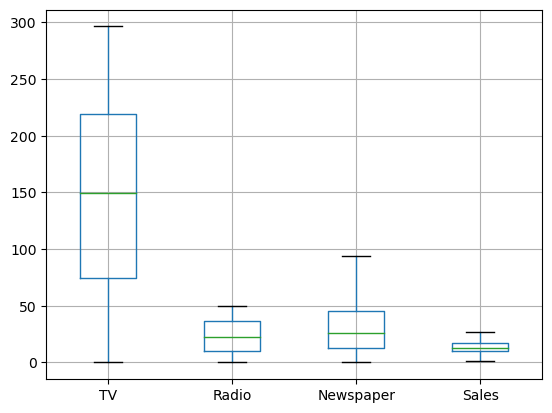

In [14]:
new_capped_df.boxplot()

## Data Scaling 

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
SS = StandardScaler()
new_scaled_df=SS.fit_transform(new_capped_df)

<Axes: >

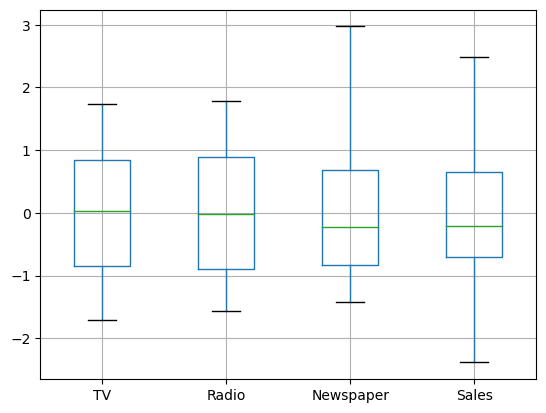

In [16]:
new_scaled_df= pd.DataFrame(data= new_scaled_df, columns= new_capped_df.columns)
new_scaled_df.boxplot()

## Model Building 

In [17]:
#Making data ready for training and testing  by spliting the data into train and test
x= new_scaled_df.drop(['Sales'],axis=1)
y=new_scaled_df['Sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=101)
print(x_train.shape, x_test.shape)

(160, 3) (40, 3)


In [18]:
training_score_R2 = []
testing_score_R2 = []
training_score_mse = []
testing_score_mse = []
training_score_rmse = []
testing_score_rmse = []

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def model_prediction_func(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    
    # Calculating R2 score 
    R2_score_train = r2_score(y_train, x_train_pred) *100
    R2_score_test = r2_score(y_test, x_test_pred ) *100
    
    # Calculate Mean Squared Error (MSE)
    mse_train = mean_squared_error(y_train, x_train_pred)
    mse_test =  mean_squared_error(y_test, x_test_pred)
    
    # Calculate Root Mean squared Error (RMSE)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)


    training_score_R2.append(R2_score_train)
    testing_score_R2.append(R2_score_test)
    training_score_mse.append(mse_train)
    testing_score_mse.append(mse_test)
    training_score_rmse.append(rmse_train)
    testing_score_rmse.append(rmse_test)
    

    # Print R2, MSE, and RMSE scores
    print(f"R2 Score of training data : {R2_score_train:.2f} ")
    print(f"R2 Score of testing data  : {R2_score_test:.2f}")
    print(f"MSE of trainig data       : {mse_train:.2f}")
    print(f"MSE of training data      : {mse_test:.2f}")
    print(f"RMSE of training data     : {rmse_train:.2f}")
    print(f"RMSE of testing           : {rmse_test:.2f}")
    

In [20]:
model_prediction_func(LinearRegression())

R2 Score of training data : 88.77 
R2 Score of testing data  : 93.03
MSE of trainig data       : 0.11
MSE of training data      : 0.08
RMSE of training data     : 0.33
RMSE of testing           : 0.28


In [21]:
model_prediction_func(DecisionTreeRegressor())

R2 Score of training data : 100.00 
R2 Score of testing data  : 94.71
MSE of trainig data       : 0.00
MSE of training data      : 0.06
RMSE of training data     : 0.00
RMSE of testing           : 0.24


In [22]:
model_prediction_func(RandomForestRegressor())

R2 Score of training data : 99.68 
R2 Score of testing data  : 98.21
MSE of trainig data       : 0.00
MSE of training data      : 0.02
RMSE of training data     : 0.06
RMSE of testing           : 0.14


In [23]:
model_prediction_func(AdaBoostRegressor())

R2 Score of training data : 97.42 
R2 Score of testing data  : 96.01
MSE of trainig data       : 0.03
MSE of training data      : 0.04
RMSE of training data     : 0.16
RMSE of testing           : 0.21


In [24]:
model_prediction_func(GradientBoostingRegressor())

R2 Score of training data : 99.84 
R2 Score of testing data  : 98.66
MSE of trainig data       : 0.00
MSE of training data      : 0.01
RMSE of training data     : 0.04
RMSE of testing           : 0.12


In [25]:
model_prediction_func(GradientBoostingRegressor())

R2 Score of training data : 99.84 
R2 Score of testing data  : 98.67
MSE of trainig data       : 0.00
MSE of training data      : 0.01
RMSE of training data     : 0.04
RMSE of testing           : 0.12


In [26]:
Models = ['Linear Regression','DecisionTree Regressor','RandomForest Regressor','ADA boost','GredientDecent Regressor','XGBoost Regressor']

In [27]:
Results_Dataframe = pd.DataFrame({'Algorithms': Models,'Training Score_R2': training_score_R2,'Testing Score_R2': testing_score_R2 ,
                                  'Training Score_mse': training_score_mse,'Testing Score_mse': testing_score_mse,
                                  'Training Score_rmse' : training_score_rmse,'Testing Score_rmse': testing_score_rmse})

# All Result Tabulation

In [28]:
Results_Dataframe

,Algorithms,Training Score_R2,Testing Score_R2,Training Score_mse,Testing Score_mse,Training Score_rmse,Testing Score_rmse
0,Linear Regression,88.765454,93.029571,0.109611,0.076201,0.331076,0.276045
1,DecisionTree Regressor,100.000000,94.710445,0.000000,0.057826,0.000000,0.240470
2,RandomForest Regressor,99.681909,98.212618,0.003103,0.019540,0.055709,0.139785
3,ADA boost,97.422722,96.012315,0.025145,0.043594,0.158573,0.208791
4,GredientDecent Regressor,99.835965,98.663950,0.001600,0.014606,0.040005,0.120854
5,XGBoost Regressor,99.835965,98.666416,0.001600,0.014579,0.040005,0.120743


## Conclusion:

#### Sales prediction is a crucial task for businesses seeking to optimize their advertising budgets and make informed decisions. In this project, we embarked on a journey to predict future sales using machine learning techniques in Python. Our goal was to help businesses anticipate sales based on various factors, including advertising spend, target audience segmentation, and advertising platforms.

## Model Performance:

#### We employed several machine learning models, including Linear Regression, DecisionTree Regressor, RandomForest Regressor, ADA Boost, Gradient Descent Regressor, and XGBoost Regressor. The results were outstanding, with each model achieving impressive accuracy levels on the testing data, ranging from 93% to 99%. This indicates the robustness and effectiveness of our predictive models in capturing the underlying patterns in the data.

## Key Takeaways:

#### Accurate Sales Prediction: Our models demonstrated the ability to accurately forecast sales, providing businesses with valuable insights into future performance.
